# 2. Prove that if a cryptosystem has perfect secrecy and |K|= |C|= |P|, then every ciphertext is equally probable.

We say that a cryptosystem has perfect secrecy if the probability of a message, given a ciphertext, is the same as the probability of the message in spite of the received ciphertext. Hence, knowing the ciphertext gives no information about the original message:

$$
p(a|b) = p(a)
$$

for any $a \in P$ (the plaintext) and $y \in C$ (the ciphertext). 

Now, given that our cryptosystem has perfect secrecy, we can try to use Baye's Theorem:

$$
p(a|b) = \frac{p(b|a)p(a)}{p(b)}
$$

because of perfect secrecy, we get:
$$
p(a) = \frac{p(b|a)p(a)}{p(b)}
$$

$$
p(b|a) = p(b)
$$

which means that the probability of obtaining an specific ciphertext $b$ given a plaintext $a$ is the same as just obtaining $b$.

Now, we know that $|K| = |C| = |P|$, where:

* $|K|$: all the possible keys
* $|C|$: all the possible ciphertexts
* $|P|$: all the possible plaintexts

we can state that all this "sets" have a one-to-one correspondance, which means that we can map each plaintext to a unique ciphertext using a unique key $k$ (each pair (a,b) can be uniquely linked through $k$). So there is only **one** key $k$ that satisfies:

$$
e_k(a) = b
$$

Now, to obtain an specific $k_i$ from the set of all possible keys ($|K|$), we need every key $k_i$ to have the same probability since we have perfect secrecy, which ensures that there is no key more "special" or "more likely" to be picked than the other keys that form the set $|K|$ of all possible keys:

$$
p(k) = \frac{1}{|K|}
$$

this equality ensures that each plaintext has a unique key that can map it to a given ciphertext, and all keys are equally likely.

Now, let’s calculate the probability of a specific ciphertext ($p(b)$). To find it, it is neccessary to take into consideration all possible plaintext messages $a \in P$ that could have been turned into the ciphertext $b$. For this, the law of Total Probability is neccesary:

$$
p(b) = \sum_{a \in P}^{} p(b|a)p(a)
$$

where it is also taken into consideration the probability that a ciphertext $b$ is the result of encrypting a given plaintext $a$ and the probability of picking a plaintext $a$.

Now, given a plaintext $a$ and its corresponding ciphertext $b$ the encryption function $e_k(a)=b$ implies that:

$$
p(b|a) = \frac{1}{|K|}
$$

because there is exactly one key that maps a to b, and each key has the same probability to be picked, so:

$$
p(b) = \sum_{a \in P}^{} p(b|a)p(a) = \sum_{a \in P}^{} \frac{1}{|K|}p(a)
$$

$$
p(b) = \frac{1}{|K|}\sum_{a \in P}p(a)
$$

assuming a perfect distribution over plain text messages, which means that every $a \in P$ has an equal probability, $\sum_{a \in P}p(a) = 1$:

$$
p(b) = \frac{1}{|K|}
$$

and since $|K| = |C|$:

$$
p(b) = \frac{1}{|C|}
$$

which means that each ciphertext $b$ has the same probability of being picked $\blacksquare$.

# 3. Suppose that APNDJI or XYGROBO are ciphertexts that are obtained from encryption using the Shift Cipher. Show in each case that there are two ”meaningful” plaintexts that could encrypt to the given ciphertext.

We can use a caesar decryption proccess in order to fulfill this task. 

In [3]:
def caesar_decrypt(ciphertext, shift):
    decrypted_text = ""
    
    for char in ciphertext:
        if char.isalpha():  # we only work with alphabetic characters
            ascii_offset = 65 if char.isupper() else 97 # deal with lower or uppercase 
            decrypted_text += chr((ord(char) - ascii_offset - shift) % 26 + ascii_offset)
        else:
            decrypted_text += char 

    return decrypted_text

In order to prove that there are at two "meaningful" plaintexts as a result of the decryption process, we can donwload a list of english words from a source like https://github.com/dwyl/english-words, list that can be found in the `words.txt` file. The use of it is justified since it serves as a reference to determine which decrypted outputs are valid English words.

In [4]:
# Load a list of English words
with open("words.txt") as word_file:
    english_words = set(word.strip().lower() for word in word_file)

Once that is done, the rest is just try the 26 possibilities of shift that are available

## For the ciphertext **APNDJI**

In [5]:
# Check if each decrypted text is a valid English word
for shift in range(26):
    decrypted_message = caesar_decrypt("APNDJI", shift).lower()
    if decrypted_message in english_words:
        print(f"Shift {shift}: {decrypted_message.upper()} is a valid word")

Shift 15: LAYOUT is a valid word
Shift 21: FUSION is a valid word


## For the ciphertext **XYGROBO**

In [6]:
# Check if each decrypted text is a valid English word
for shift in range(26):
    decrypted_message = caesar_decrypt("XYGROBO", shift).lower()
    if decrypted_message in english_words:
        print(f"Shift {shift}: {decrypted_message.upper()} is a valid word")

Shift 10: NOWHERE is a valid word
Shift 23: ABJURER is a valid word


Thus, for each ciphertext, two different shifts that produce meaningful plaintexts were shown, meeting the requirements of the problem $\blacksquare$.

# 4. Compute $H(K|C)$ and $H(K|P, C)$ for the Affine Cipher, assuming that keys are used equiprobably and the plaintexts are equiprobable.


### **Option 1**

As we know, for the affine cipher each letter of the plain text $P$ transforms into a cipher text $C$ using this function: $C = (aP + b)\space mod \space m$
Let's calculate the key space $|K|$

$|K| = \phi(m) \times m $ In this case, we have to consider that we are using the English alphabet, which has 26 characters, so $m=26$

Eulers totient $\phi(26) = 12$

So $|K| = 12 \times 26 = 312$

* Calculation for $H(K)$

$H(K) = \log_2 |K| = \log_2 312 = 8.29$ bits This is the key's entropy

* Calculations for $H(K|P,C)$

As we know, affine ciphers formula encryption is $C=(aP + b) \space mod \space m$ 

if we know $P$ and $C$ we could resolve for $a$ and $b$. With most of the pairs of $(P,C)$ we could determine $K$

So we get that $H(K|P,C) = 0$ bits


* Calculations for $H(K|C)$

Considering that we only have the cipher text, the information needed to calculate $K$ is not enough. Because for each $C$ there are multiple pairs of $(P,K)$ that can produce it, on the other hand, we have to consider that for long cipher texts we can apply different cryptographic analysis techniques that can reduce the uncertainty over $K$

So $H(K|C) > 0$ $\blacksquare$.

### **Option 2**

### 1. Affine Cipher and Key Space:

The Affine Cipher encrypts a message using the formula:

$$
C = (a \times P + b) \% m
$$

where:
- $C$ is the ciphertext,
- $P$ is the plaintext,
- $a$ and $b$ are the keys (with $a$ and $m$ being coprime),
- $m$ is the size of the alphabet (e.g., 26 for English).

The key space $K$ consists of all valid pairs $(a, b)$, where:
- $a$ is an integer such that $\gcd(a, m) = 1$,
- $b$ is any integer from $0$ to $m-1$.

The total number of possible keys $|K|$ is $\varphi(m) \times m$, where $\varphi(m)$ is Euler’s totient function, giving the number of integers less than $m$ that are coprime to $m$.

### 2. Compute $H(K|C)$:

$H(K|C)$ measures the uncertainty about the key $K$ given the ciphertext $C$.

Since keys are used equiprobably and plaintexts are equiprobable, the mapping between $K$ and $C$ is deterministic. For each ciphertext $C$, there is exactly one possible key $(a, b)$ that maps a given plaintext $P$ to $C$.

Thus, knowing $C$ does not necessarily provide information about the specific key $(a, b)$ without knowing the plaintext $P$.

As a result:

$$
H(K|C) = \log_2(|K|)
$$

This reflects the entropy of the key space when only the ciphertext is known.

### 3. Compute $H(K|P, C)$:

$H(K|P, C)$ measures the uncertainty about the key $K$ given both the plaintext $P$ and the ciphertext $C$.

Since the relationship between $P$, $C$, and $K$ is deterministic for the Affine Cipher, knowing both $P$ and $C$ will determine $K$. Therefore:

$$
H(K|P, C) = 0
$$

This indicates that the key is fully determined when both plaintext and ciphertext are known $\blacksquare$.

## 5. Below are given four examples of ciphertext, one obtained from a Substitution Cipher, one from a Vigen` ere Cipher, one from an Affine Cipher, and one unspecified. In each case, the task is to determine the plaintext. Give a clearly written description of the steps you followed to decrypt each ciphertext. This should include all statistical analysis and computations you performed. The first two plaintexts were taken from The Diary of Samuel Marchbanks, by Robertson Davies, Clarke Irwin, 1947; the fourth was taken from Lake Wobegon Days, by Garrison Keillor, Viking Penguin, Inc., 1985.

In [7]:
def calc_fitness(txt, quadgrams, alphabet):
    # Create a mapping of each character to a numerical value
    trans = {val: key for key, val in enumerate(alphabet.lower())}
    
    # Iterator to convert text into numerical values
    def text_iterator(txt):
        for char in txt.lower():
            val = trans.get(char)
            if val is not None:
                yield val

    iterator = text_iterator(txt)
    
    # Calculate initial quadgram value using the first three characters
    try:
        quadgram_val = next(iterator)
        quadgram_val = (quadgram_val << 5) + next(iterator)
        quadgram_val = (quadgram_val << 5) + next(iterator)
    except StopIteration:
        raise ValueError("More than three characters from the given alphabet are required")

    fitness = 0
    nbr_quadgrams = 0

    # Compute fitness score using quadgrams
    for numerical_char in iterator:
        quadgram_val = ((quadgram_val & 0x7FFF) << 5) + numerical_char
        # If quadgram exists, add its score; otherwise, penalize
        if quadgram_val < len(quadgrams):
            fitness += quadgrams[quadgram_val]
        else:
            fitness += -10 
        nbr_quadgrams += 1

    if nbr_quadgrams == 0:
        raise ValueError("More than three characters from the given alphabet are required")

    # Normalize the fitness score by the number of quadgrams
    return fitness / nbr_quadgrams / 10

To solve this question we have to use quadgrams the quadgrams and the fitness function to evaluate the text were obtained from here https://gitlab.com/guballa/SubstitutionBreaker/-/blob/master/subbreaker/breaker.py?ref_type=heads

## 5.1 Substitution Cipher: 
EMGLOSUDCGDNCUSWYSFHNSFCYKDPUMLWGYICOXYSIPJCKQPKUGKMGOLICGINCGACKSNISACYKZSCKXECJCKSHYSXCGOIDPKZCNKSHICGIWYGKKGK
GOLDSILKGOIUSIGLEDSPWZUGFZCCNDGYYSFUSZCNXEOJNCGYEOWEUPXEZGACGNFGLKNSACIGOIYCKXCJUCIUZCFZCCNDGYYSFEUEKUZCSOCFZCCNC
IACZEJNCSHFZEJZEGMXCYHCJUMGKUCY



In [8]:
import re
from collections import Counter
import random
import json
import math

# Provided ciphertext
ciphertext = '''
EMGLOSUDCGDNCUSWYSFHNSFCYKDPUMLWGYICOXYSIPJCK
QPKUGKMGOLICGINCGACKSNISACYKZSCKXECJCKSHYSXCG
OIDPKZCNKSHICGIWYGKKGKGOLDSILKGOIUSIGLEDSPWZU
GFZCCNDGYYSFUSZCNXEOJNCGYEOWEUPXEZGACGNFGLKNS
ACIGOIYCKXCJUCIUZCFZCCNDGYYSFEUEKUZCSOCFZCCNC
IACZEJNCSHFZEJZEGMXCYHCJUMGKUCY
'''

# Clean the ciphertext: remove non-alphabetic characters and convert to uppercase
clean_text = re.sub(r'[^A-Z]', '', ciphertext.upper())


In [9]:
# Calculate the frequency of individual letters in the ciphertext
single_freq = Counter(clean_text)

# English letter frequency (most to least frequent)
english_freq = list('ETAOINSHRDLCUMWFGYPBVKJXQZ')

# Define the alphabet and create a mapping from letter to index
alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
letter_to_index = {letter: i for i, letter in enumerate(alphabet)}

print("Letter frequencies in the ciphertext:" + str(single_freq))


Letter frequencies in the ciphertext:Counter({'C': 37, 'G': 24, 'S': 20, 'K': 18, 'Y': 15, 'I': 15, 'U': 14, 'N': 13, 'Z': 13, 'E': 12, 'O': 10, 'F': 9, 'D': 8, 'L': 7, 'X': 7, 'J': 7, 'P': 6, 'M': 5, 'W': 5, 'H': 5, 'A': 5, 'Q': 1})


In [10]:
def create_initial_key():
    key = [''] * 26
    # Sort the ciphertext letters by frequency
    sorted_cipher_letters = [letter for letter, freq in sorted(single_freq.items(), key=lambda x: x[1], reverse=True)]
    used_plain_letters = set()

    # Map the most frequent letters in the ciphertext to the most frequent English letters
    for i, cipher_letter in enumerate(sorted_cipher_letters):
        cipher_index = letter_to_index[cipher_letter]
        plain_letter = english_freq[i]
        # Assign the letter if it has not been used already
        if plain_letter not in used_plain_letters:
            key[cipher_index] = plain_letter
            used_plain_letters.add(plain_letter)
        else:
            # Assign an unused letter if the plain letter is already used
            for letter in english_freq:
                if letter not in used_plain_letters:
                    key[cipher_index] = letter
                    used_plain_letters.add(letter)
                    break

    # Assign any remaining letters that have not been used yet
    for i in range(26):
        if key[i] == '':
            for letter in english_freq:
                if letter not in used_plain_letters:
                    key[i] = letter
                    used_plain_letters.add(letter)
                    break
            else:
                # Use the remaining letters from the alphabet if english_freq letters are exhausted
                for letter in alphabet:
                    if letter not in used_plain_letters:
                        key[i] = letter
                        used_plain_letters.add(letter)
                        break
    return key


def apply_key(ciphertext, key):
    plaintext = ''
    # Replace each letter in the ciphertext with its corresponding letter in the key
    for c in ciphertext:
        index = letter_to_index[c]
        plaintext += key[index]
    return plaintext

# Function to swap two letters in the key
def swap_letters(key, index1, index2):
    # Create a copy of the key and swap the letters at the given indices
    new_key = key.copy()
    new_key[index1], new_key[index2] = new_key[index2], new_key[index1]
    return new_key

This function creates an initial decryption key by matching the most frequent letters in the ciphertext to the most frequent letters in English. It ensures that each letter in the ciphertext maps to a unique letter in the plaintext

In [11]:
def decrypt(ciphertext, initial_key, quadgrams, alphabet, max_iterations=8000, temp=1.0, cooling_rate=0.995, restart_threshold=700):
    current_key = initial_key.copy()
    current_plaintext = apply_key(ciphertext, current_key)
    current_fitness = calc_fitness(current_plaintext, quadgrams, alphabet)
    best_key = current_key.copy()
    best_fitness = current_fitness
    print(f"Initial fitness score: {current_fitness}")

    no_improvement_count = 0

    # Iteratively attempt to improve the key
    for iteration in range(max_iterations):
        temp *= cooling_rate

        # Swap two random positions in the key
        index1, index2 = random.sample(range(26), 2)
        new_key = swap_letters(current_key, index1, index2)
        new_plaintext = apply_key(ciphertext, new_key)
        new_fitness = calc_fitness(new_plaintext, quadgrams, alphabet)

        # Decide whether to accept the new key based on fitness
        if new_fitness > current_fitness:
            accept = True
            no_improvement_count = 0
        else:
            delta = new_fitness - current_fitness
            probability = math.exp(delta / temp)
            accept = random.random() < probability
            no_improvement_count += 1

        # Update the current key if accepted
        if accept:
            current_key = new_key.copy()
            current_fitness = new_fitness

            # Update the best key if the new fitness is better
            if current_fitness > best_fitness:
                best_key = current_key.copy()
                best_fitness = current_fitness
                print(f"Iteration {iteration}: New best fitness score: {best_fitness}")
        
        # Restart with a random key if no improvement after many iterations
        if no_improvement_count >= restart_threshold:
            current_key = list(alphabet)
            random.shuffle(current_key)
            current_plaintext = apply_key(ciphertext, current_key)
            current_fitness = calc_fitness(current_plaintext, quadgrams, alphabet)
            no_improvement_count = 0
            temp = 2.0

    return best_key, best_fitness


This function uses simulated annealing to optimize the decryption key by iteratively improving it. It tries random swaps of letters and accepts changes that improve the fitness score or, occasionally, those that do not. It also implements a restart mechanism to help explore the solution space more thoroughly.

In [12]:
# Load quadgram data from the JSON file
with open("EN.json", "r") as quadgram_fh:
    quadgram_data = json.load(quadgram_fh)
    alphabet = quadgram_data["alphabet"]
    quadgrams = quadgram_data["quadgrams"]


Loads the quadgram data from a JSON file, which contains frequency information about letter sequences in English. This data is crucial for calculating the fitness score of the decrypted text, indicating how likely a text is to be meaningful English.

In [13]:
def print_key_comparison(key):
    print("\nAlphabet: ", ' '.join(alphabet))
    print("Key     : ", ' '.join(key))

# Create the initial key based on frequency analysis
initial_key = create_initial_key()

# Apply the initial key to decrypt the ciphertext
initial_plaintext = apply_key(clean_text, initial_key)

# Calculate the fitness score for the initial decryption
initial_fitness = calc_fitness(initial_plaintext, quadgrams, alphabet)

# Display the initial key, decrypted text, and its fitness score
print("\nInitial key based on frequency analysis:")
print_key_comparison(initial_key)
print("\nInitial plaintext:\n", initial_plaintext)
print(f"\nInitial fitness score: {initial_fitness}")



Initial key based on frequency analysis:

Alphabet:  a b c d e f g h i j k l m n o p q r s t u v w x y z
Key     :  V J E U D C T B N F O M Y H L G K X A Q S Z P W I R

Initial plaintext:
 DYTMLASUETUHESAPIACBHACEIOUGSYMPTINELWIANGFEOKGOSTOYTLMNETNHETVEOAHNAVEIORAEOWDEFEOABIAWETLNUGOREHOABNETNPITOOTOTLMUANMOTLNSANTMDUAGPRSTCREEHUTIIACSAREHWDLFHETIDLPDSGWDRTVETHCTMOHAVENTLNIEOWEFSENSRECREEHUTIIACDSDOSREALECREEHENVERDFHEABCRDFRDTYWEIBEFSYTOSEI

Initial fitness score: 60.12569169960474


In [14]:
# Optimize the key
optimized_key, optimized_fitness = decrypt(clean_text, initial_key, quadgrams, alphabet)

# Apply the optimized key to decrypt the ciphertext
optimized_plaintext = apply_key(clean_text, optimized_key)

# Display the optimized plaintext, fitness score, and key comparison
print("\nOptimized plaintext:\n", optimized_plaintext)
print(f"\nOptimized fitness score: {optimized_fitness}")

print_key_comparison(optimized_key)


Initial fitness score: 60.12569169960474
Iteration 1: New best fitness score: 61.31739130434782
Iteration 2: New best fitness score: 61.3403162055336
Iteration 29: New best fitness score: 63.29169960474309
Iteration 39: New best fitness score: 64.60553359683794
Iteration 204: New best fitness score: 65.8403162055336
Iteration 205: New best fitness score: 67.23359683794466
Iteration 211: New best fitness score: 68.29841897233202
Iteration 213: New best fitness score: 68.32094861660079
Iteration 225: New best fitness score: 68.34584980237153
Iteration 228: New best fitness score: 68.51185770750989
Iteration 231: New best fitness score: 69.73399209486166
Iteration 258: New best fitness score: 70.33715415019762
Iteration 265: New best fitness score: 70.65533596837945
Iteration 271: New best fitness score: 71.20158102766798
Iteration 275: New best fitness score: 71.30434782608697
Iteration 289: New best fitness score: 71.51857707509882
Iteration 297: New best fitness score: 71.9747035573122

## 5.2 Vigenere Cipher:
KCCPKBGUFDPHQTYAVINRRTMVGRKDNBVFDETDGILTXRGUDDKOTFMBPVGEGLTGCKQRACQCWDNAWCRXIZAKFTLEWRPTYCQKYVXCHKFTPONCQQRHJVAJUWETMC
MSPKQDYHJVDAHCTRLSVSKCGCZQQDZXGSFRLSWCWSJTBHAFSIASPRJAHKJRJUMVGKMITZHFPDISPZLVLGWTFPLKKEBDPGCEBSHCTJRWXBAFSPEZQNRWXCVYC
GAONWDDKACKAWBBIKFTIOVKCGGHJVLNHIFFSQESVYCLACNVRWBBIREPBBVFEXOSCDYGZWPFDTKFQIYCWHJVLNHIQIBTKHJVNPIST


First we have to make an kasiski analysis to determine key length 

In [32]:
from collections import defaultdict

cypertext = "KCCPKBGUFDPHQTYAVINRRTMVGRKDNBVFDETDGILTXRGUDDKOTFMBPVGEGLTGCKQRACQCWDNAWCRXIZAKFTLEWRPTYCQKYVXCHKFTPONCQQRHJVAJUWETMCMSPKQDYHJVDAHCTRLSVSKCGCZQQDZXGSFRLSWCWSJTBHAFSIASPRJAHKJRJUMVGKMITZHFPDISPZLVLGWTFPLKKEBDPGCEBSHCTJRWXBAFSPEZQNRWXCVYCGAONWDDKACKAWBBIKFTIOVKCGGHJVLNHIFFSQESVYCLACNVRWBBIREPBBVFEXOSCDYGZWPFDTKFQIYCWHJVLNHIQIBTKHJVNPIST"

# Function to find repeated sequences and their distances
def kasiski_analysis(text, sequence_length=3):
    # Dictionary to store sequences and their positions
    sequences = defaultdict(list)

    # Find all sequences of the given length and store their positions
    for i in range(len(text) - sequence_length + 1):
        seq = text[i:i + sequence_length]
        sequences[seq].append(i)
    
    # Filter sequences that repeat and calculate distances between their occurrences
    repeating_sequences = {seq: positions for seq, positions in sequences.items() if len(positions) > 1}

    # Calculate the distances between positions of repeated sequences
    distances = defaultdict(list)
    for seq, positions in repeating_sequences.items():
        for i in range(len(positions) - 1):
            distance = positions[i + 1] - positions[i]
            distances[seq].append(distance)
    
    return distances

# Function to get all factors of a number
def get_factors(n):
    factors = []
    # Loop through all numbers up to n to find factors
    for i in range(1, n + 1):
        if n % i == 0:
            factors.append(i)
    return factors

# Run the Kasiski analysis
kasiski_result = kasiski_analysis(ciphertext)

# Calculate the factors of each distance and display them
print("Kasiski Analysis Results:")
for sequence, dist in kasiski_result.items():
    print(f"Sequence: '{sequence}' - Distances: {dist}")
    for d in dist:
        factors = get_factors(d)
        print(f"  Distance: {d}, Factors: {factors}")


Kasiski Analysis Results:
Sequence: 'AVF' - Distances: [132]
  Distance: 132, Factors: [1, 2, 3, 4, 6, 11, 12, 22, 33, 44, 66, 132]
Sequence: 'VVR' - Distances: [149]
  Distance: 149, Factors: [1, 149]
Sequence: 'GES' - Distances: [180]
  Distance: 180, Factors: [1, 2, 3, 4, 5, 6, 9, 10, 12, 15, 18, 20, 30, 36, 45, 60, 90, 180]
Sequence: 'MMA' - Distances: [120]
  Distance: 120, Factors: [1, 2, 3, 4, 5, 6, 8, 10, 12, 15, 20, 24, 30, 40, 60, 120]
Sequence: 'MAS' - Distances: [120]
  Distance: 120, Factors: [1, 2, 3, 4, 5, 6, 8, 10, 12, 15, 20, 24, 30, 40, 60, 120]
Sequence: 'CGJ' - Distances: [68]
  Distance: 68, Factors: [1, 2, 4, 17, 34, 68]
Sequence: 'ASC' - Distances: [96]
  Distance: 96, Factors: [1, 2, 3, 4, 6, 8, 12, 16, 24, 32, 48, 96]
Sequence: 'EAH' - Distances: [54]
  Distance: 54, Factors: [1, 2, 3, 6, 9, 18, 27, 54]
Sequence: 'AHT' - Distances: [54]
  Distance: 54, Factors: [1, 2, 3, 6, 9, 18, 27, 54]
Sequence: 'SIC' - Distances: [127]
  Distance: 127, Factors: [1, 127]
Seq

After that we can make an IC to know what are the posibles key lenghts

In [33]:
from collections import Counter

# Function to calculate the Index of Coincidence (IC) of a text
def index_of_coincidence(text):
    # Count the frequency of each letter
    frequency = Counter(text)
    n = len(text)
    
    # Calculate the IC using the formula: sum(f_i * (f_i - 1)) / (n * (n - 1))
    ic = sum(f * (f - 1) for f in frequency.values()) / (n * (n - 1)) if n > 1 else 0
    return ic

# Function to calculate the IC for different key lengths
def calculate_ic_for_key_lengths(text, max_key_length=20):
    ic_results = {}
    
    # Test key lengths from 1 to max_key_length
    for key_length in range(1, max_key_length + 1):
        # Split the text into 'key_length' groups
        groups = [''.join([text[i] for i in range(j, len(text), key_length)]) for j in range(key_length)]
        
        # Calculate the IC for each group and find the average IC for this key length
        ic_values = [index_of_coincidence(group) for group in groups]
        average_ic = sum(ic_values) / len(ic_values)
        
        # Store the average IC for the current key length
        ic_results[key_length] = average_ic
    
    return ic_results

# Run the IC calculation for key lengths from 1 to 20
ic_results = calculate_ic_for_key_lengths(ciphertext, max_key_length=20)

# Sort the IC results by value in descending order
sorted_ic_results = sorted(ic_results.items(), key=lambda x: x[1], reverse=True)

# Display the sorted IC results for each key length
print("IC Results for different key lengths (sorted):")
for key_length, ic_value in sorted_ic_results:
    print(f"Key Length: {key_length}, Average IC: {ic_value:.4f}")

# Suggest possible key lengths based on IC values close to 0.06 (typical for English text)
threshold = 0.06
possible_key_lengths = [length for length, ic in sorted_ic_results if abs(ic - threshold) < 0.01]
print("\nPossible key lengths (IC close to 0.06):", possible_key_lengths)


IC Results for different key lengths (sorted):
Key Length: 12, Average IC: 0.0648
Key Length: 6, Average IC: 0.0606
Key Length: 18, Average IC: 0.0550
Key Length: 8, Average IC: 0.0513
Key Length: 4, Average IC: 0.0486
Key Length: 20, Average IC: 0.0484
Key Length: 16, Average IC: 0.0472
Key Length: 15, Average IC: 0.0470
Key Length: 3, Average IC: 0.0468
Key Length: 14, Average IC: 0.0466
Key Length: 10, Average IC: 0.0463
Key Length: 2, Average IC: 0.0453
Key Length: 9, Average IC: 0.0445
Key Length: 11, Average IC: 0.0424
Key Length: 7, Average IC: 0.0418
Key Length: 5, Average IC: 0.0415
Key Length: 1, Average IC: 0.0414
Key Length: 19, Average IC: 0.0411
Key Length: 13, Average IC: 0.0408
Key Length: 17, Average IC: 0.0396

Possible key lengths (IC close to 0.06): [12, 6, 18, 8]


In [17]:
# Importing required libraries
import string
from collections import Counter
from itertools import product
import time
import json

# Function to split the ciphertext into blocks according to the key length
def divide_text_into_blocks(ciphertext, key_length):
    blocks = ['' for _ in range(key_length)]
    for i, char in enumerate(ciphertext):
        blocks[i % key_length] += char
    return blocks

# Function to generate probable key shifts based on letter frequency analysis
def get_key_letter_candidates(block, num_candidates=3):
    block_counter = Counter(block)
    
    # List to store the most probable key letters
    candidates = []
    
    # Sort the most common letters in the block
    most_common_letters = block_counter.most_common()
    
    # Always select 'E' as the most frequent letter to reduce randomness
    frequent_letter = 'E'

    # Calculate probable shifts based on common letters in English
    for i in range(min(num_candidates, len(most_common_letters))):
        most_common_letter = most_common_letters[i][0]
        # The shift is calculated relative to the most frequent letter 'E'
        shift = (string.ascii_uppercase.index(most_common_letter) - string.ascii_uppercase.index(frequent_letter)) % 26
        candidates.append(string.ascii_uppercase[shift])
    
    return candidates



The first function divides the ciphertext into blocks based on the length of the key. The second function analyzes each block's frequency and generates probable key candidates by assuming the most common letter in English ('E') should match the most common letter in the block.

In [18]:
# Function to generate all possible key combinations
def generate_probable_keys(blocks, num_candidates=3):
    # Get lists of candidate key letters for each block
    candidate_letters = [get_key_letter_candidates(block, num_candidates) for block in blocks]
    
    # Generate all possible key combinations
    probable_keys = [''.join(key) for key in product(*candidate_letters)]
    
    return probable_keys

# Function to decrypt a Vigenère cipher text using a given key
def vigenere_decrypt(ciphertext, key):
    alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    decrypted_text = []
    key_length = len(key)
    key_as_int = [alphabet.index(k) for k in key]
    ciphertext_int = [alphabet.index(c) for c in ciphertext]
    
    for i in range(len(ciphertext_int)):
        # Decrypt by subtracting the key's value
        value = (ciphertext_int[i] - key_as_int[i % key_length]) % 26
        decrypted_text.append(alphabet[value])
    
    # Returns the decrypted text in uppercase
    return ''.join(decrypted_text).upper()


In [19]:
# Function to evaluate a key using the fitness function
def evaluate_key(ciphertext, key, quadgrams, alphabet):
    decrypted_text = vigenere_decrypt(ciphertext, key)
    
    if len(decrypted_text) < 4:
        return key, -float('inf')  # If the decrypted text is too short, return a very low score
    
    try:
        fitness_score = calc_fitness(decrypted_text, quadgrams, alphabet)
        return key, fitness_score
    except ValueError:
        return key, -float('inf')  # In case of an error, return a low score

# Function to evaluate all keys sequentially and sort them by fitness
def evaluate_keys(ciphertext, probable_keys, quadgrams, alphabet):
    key_fitness_scores = []
    
    # Evaluate each key sequentially
    for key in probable_keys:
        key, fitness_score = evaluate_key(ciphertext, key, quadgrams, alphabet)
        if fitness_score > -float('inf'):
            key_fitness_scores.append((key, fitness_score))
    
    # Sort keys by their fitness score in descending order
    key_fitness_scores.sort(key=lambda x: x[1], reverse=True)
    
    return key_fitness_scores


These functions evaluate each generated key based on the fitness score (how likely the decrypted text resembles English) and then sort the keys by their fitness scores to find the most likely correct key.

In [20]:
# Start time
start_time = time.time()

# Ciphertext to decrypt
ciphertext = ("KCCPKBGUFDPHQTYAVINRRTMVGRKDNBVFDETDGILTXRGUDDKOTFMBPVGEGLTGCKQRACQCWDNAWCRXIZAKFTLEWRPTYCQKYVXCHKFTPONCQQRHJVAJUWETMCMSPKQDYHJVDAHCTRLSVSKCGCZQQDZXGSFRLSWCWSJTBHAFSIASPRJAHKJRJUMVGKMITZHFPDISPZLVLGWTFPLKKEBDPGCEBSHCTJRWXBAFSPEZQNRWXCVYCGAONWDDKACKAWBBIKFTIOVKCGGHJVLNHIFFSQESVYCLACNVRWBBIREPBBVFEXOSCDYGZWPFDTKFQIYCWHJVLNHIQIBTKHJVNPIST")

# Assume the key length is 6
key_length = 6

# Split the ciphertext into blocks of key length
blocks = divide_text_into_blocks(ciphertext, key_length)

# Generate all probable keys
probable_keys = generate_probable_keys(blocks, num_candidates=5)
print(f"Total keys generated: {len(probable_keys)}")

# Time after key generation
gen_time = time.time()

# Load the quadgram statistics and alphabet from a pre-generated JSON file
with open("EN.json", "r") as quadgram_fh:
    quadgram_data = json.load(quadgram_fh)
    alphabet = quadgram_data["alphabet"]
    quadgrams = quadgram_data["quadgrams"]

# Evaluate the generated keys and get the top 5 based on fitness
key_fitness_scores = evaluate_keys(ciphertext, probable_keys, quadgrams, alphabet)

# End time after evaluating the keys
end_time = time.time()

# Display the top 5 most probable keys based on fitness
print("Top 5 most probable keys based on fitness:")
for i, (key, score) in enumerate(key_fitness_scores[:5]):
    print(f"Key {i+1}: {key} | Fitness: {score}")

# Print execution times
print(f"Key generation time: {gen_time - start_time:.2f} seconds")
print(f"Key evaluation time: {end_time - gen_time:.2f} seconds")
print(f"Total execution time: {end_time - start_time:.2f} seconds")


Total keys generated: 15625
Top 5 most probable keys based on fitness:
Key 1: CRYPTO | Fitness: 101.76167664670659
Key 2: CRYLTO | Fitness: 80.18203592814372
Key 3: CRYPTK | Fitness: 79.31017964071856
Key 4: CRYPWO | Fitness: 78.49401197604791
Key 5: CNYPTO | Fitness: 77.83502994011977
Key generation time: 0.00 seconds
Key evaluation time: 1.84 seconds
Total execution time: 1.84 seconds


In [21]:
# Apply the most probable key to the ciphertext
best_key = key_fitness_scores[0][0]  # Get the best key
decrypted_plaintext = vigenere_decrypt(ciphertext, best_key)

# Show the most probable key and the decrypted text
print(f"\nThe most probable key is: {best_key}")
print(f"Deciphered plaintext: \n{decrypted_plaintext}")


The most probable key is: CRYPTO
Deciphered plaintext: 
ILEARNEDHOWTOCALCULATETHEAMOUNTOFPAPERNEEDEDFORAROOMWHENIWASATSCHOOLYOUMULTIPLYTHESQUAREFOOTAGEOFTHEWALLSBYTHECUBICCONTENTSOFTHEFLOORANDCEILINGCOMBINEDANDDOUBLEITYOUTHENALLOWHALFTHETOTALFOROPENINGSSUCHASWINDOWSANDDOORSTHENYOUALLOWTHEOTHERHALFFORMATCHINGTHEPATTERNTHENYOUDOUBLETHEWHOLETHINGAGAINTOGIVEAMARGINOFERRORANDTHENYOUORDERTHEPAPER


This block runs the complete process of dividing the ciphertext, generating probable keys, evaluating each key based on its fitness, and displaying the top 5 most probable keys. It also tracks and prints the execution time for each step.

## 5.3 Affine Cipher:
KQEREJEBCPPCJCRKIEACUZBKRVPKRBCIBQCARBJCVFCUPKRIOFKPACUZQEPBKRXPEIIEABDKPBCPFCDCCAFIEABDKPBCPFEQPKAZBKRHAIBKAPCCIBURCCDKDCC
JCIDFUIXPAFFERBICZDFKABICBBENEFCUPJCVKABPCYDCCDPKBCOCPERKIVKSCPICBRKIJPKABI

In [22]:
from math import gcd

# Constants for the English alphabet
ALPHABET = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
M = len(ALPHABET)  # m = 26 for the English alphabet

# Function to calculate the modular multiplicative inverse
def mod_inverse(a, m):
    """Returns the modular multiplicative inverse of 'a' modulo 'm' if it exists."""
    for x in range(1, m):
        if (a * x) % m == 1:
            return x
    return None


In [23]:
# Function to decrypt using the Affine Cipher
def affine_decrypt(ciphertext, a, b):
    a_inv = mod_inverse(a, M)  # Multiplicative inverse of a
    if a_inv is None:
        return None  # If there is no inverse, the key is invalid

    plaintext = ''
    for char in ciphertext:
        if char in ALPHABET:
            y = ALPHABET.index(char)
            x = (a_inv * (y - b)) % M
            plaintext += ALPHABET[x]
        else:
            plaintext += char  # Keep any non-alphabetic symbols unchanged
    return plaintext


This function takes a ciphertext, and two integers a and b as inputs. It calculates the modular inverse of a and uses it to reverse the Affine Cipher formula. Each letter in the ciphertext is transformed back into plaintext using the formula $x= a_{\text{inv}}(y-b) mod M $


In [24]:
# Function to try all combinations of (a, b)
def break_affine_cipher_iteratively(ciphertext, quadgrams, alphabet, max_iterations=3, restart_threshold=100):
    """Tests all combinations of a and b iteratively to break the Affine Cipher."""
    top_results = []  # Store top five results as tuples (fitness, plaintext, a, b)
    no_improvement_count = 0

    for iteration in range(max_iterations):
        print(f"\n--- Iteration {iteration + 1} ---")
        for a in range(1, M):
            if gcd(a, M) != 1:
                continue  # a and m must be coprime
            for b in range(M):
                plaintext = affine_decrypt(ciphertext, a, b)
                if plaintext:
                    fitness = calc_fitness(plaintext, quadgrams, alphabet)  # Use the provided calc_fitness function
                    # Store results in a list and keep it sorted to have the top five
                    # Ensure we only add it if it's not a duplicate plaintext in the top results
                    if len(top_results) < 5 or fitness > top_results[-1][0]:
                        if not any(p == plaintext for _, p, _, _ in top_results):
                            # Add the new result and sort the list by fitness (descending)
                            top_results.append((fitness, plaintext, a, b))
                            top_results.sort(reverse=True, key=lambda x: x[0])
                            # Keep only the top five results
                            top_results = top_results[:5]
                            no_improvement_count = 0
                            print(f"New entry in top results: fitness {fitness} with a={a}, b={b}")
                    else:
                        no_improvement_count += 1

        # Restart if no improvement after restart_threshold attempts
        if no_improvement_count > restart_threshold:
            print(f"Restarting search after {no_improvement_count} combinations with no improvement.")
            no_improvement_count = 0  # Reset counter
            random.shuffle(top_results)  # Change order to explore different possibilities next

    return top_results


This function tries different values of a and b to find the best possible decryption.
It evaluates each decryption using the calc_fitness function, which assesses how close the decrypted text is to standard English.
Only the top 5 decryption results are kept, sorted by fitness score.
If there are no improvements after a certain threshold, it restarts the search to avoid getting stuck.

In [25]:
# Ciphertext provided (Affine Cipher)
ciphertext = '''
KQEREJEBCPPCJCRKIEACUZBKRVPKRBCIBQCARBJCVFCUPKRIOFKPACUZQEPBKRXPEIIEABDKPBCPFCDCCAFIEABDKPBCPFEQPKAZBKRHAIBKAPCCIBURCCDKDCCJCIDFUIXPAFFERBICZDFKABICBBENEFCUPJCVKABPCYDCCDPKBCOCPERKIVKSCPICBRKIJPKABI
'''.replace('\n', '')

# Clean the ciphertext
clean_text = re.sub(r'[^A-Z]', '', ciphertext.upper())

# Open the quadgram file and create a Breaker instance
with open("./EN.json", "r") as quadgram_fh:
    quadgram_data = json.load(quadgram_fh)
    alphabet = quadgram_data["alphabet"]
    quadgrams = quadgram_data["quadgrams"]

# Break the Affine Cipher iteratively using the provided calc_fitness function
top_results = break_affine_cipher_iteratively(clean_text, quadgrams, alphabet)

# Display the top five results, sorted from highest to lowest fitness
top_results.sort(reverse=True, key=lambda x: x[0])  # Sort by fitness in descending order

print("\nTop 5 Decryption Results:")
for i, (fitness, plaintext, a, b) in enumerate(top_results, 1):
    print(f"\nResult {i}:")
    print(f"Plaintext: {plaintext}")
    print(f"a: {a}, b: {b}")
    print(f"Fitness Score: {fitness}")



--- Iteration 1 ---
New entry in top results: fitness 29.995384615384616 with a=1, b=0
New entry in top results: fitness 25.666666666666668 with a=1, b=1
New entry in top results: fitness 35.31128205128205 with a=1, b=2
New entry in top results: fitness 16.590769230769233 with a=1, b=3
New entry in top results: fitness 19.066153846153846 with a=1, b=4
New entry in top results: fitness 25.65128205128205 with a=1, b=8
New entry in top results: fitness 26.83897435897436 with a=1, b=9
New entry in top results: fitness 29.544615384615383 with a=1, b=10
New entry in top results: fitness 31.078974358974357 with a=1, b=15
New entry in top results: fitness 35.092820512820516 with a=1, b=17
New entry in top results: fitness 40.84410256410256 with a=1, b=23
New entry in top results: fitness 35.41897435897436 with a=1, b=24
New entry in top results: fitness 43.38820512820513 with a=3, b=2
New entry in top results: fitness 35.22 with a=3, b=3
New entry in top results: fitness 42.81897435897436 wit

## 5.4 unspecified cipher:
BNVSNSIHQCEELSSKKYERIFJKXUMBGYKAMQLJTYAVFBKVTDVBPVVRJYYLAOKYMPQSCGDLFSRLLPROYGESEBUUALRWXMMASAZLGLEDFJBZAVVPXWICGJXASCBYEHOSNMULKCEAHTQOKMFLEBKFXLRRFDTZX
CIWBJSICBGAWDVYDHAVFJXZIBKCGJIWEAHTTOEWTUHKRQVVRGZBXYIREMMASCSPBNLHJMBLRFFJELHWEYLWISTFVVYFJCMHYUYRUFSFMGESIGRLWALSWMNUHSIMYYITCCQPZSICEHBCCMZFEGVJYOCDEM
MPGHVAAUMELCMOEHVLTIPSUYILVGFLMVWDVYDBTHFRAYISYSGKVSUUHYHGGCKTMBLRX

First, to determine what type of cipher this is, we perform a frequency analysis and compare the frequencies of the English alphabet with the frequencies of the encrypted text to see if we have a monoalphabetic cipher.

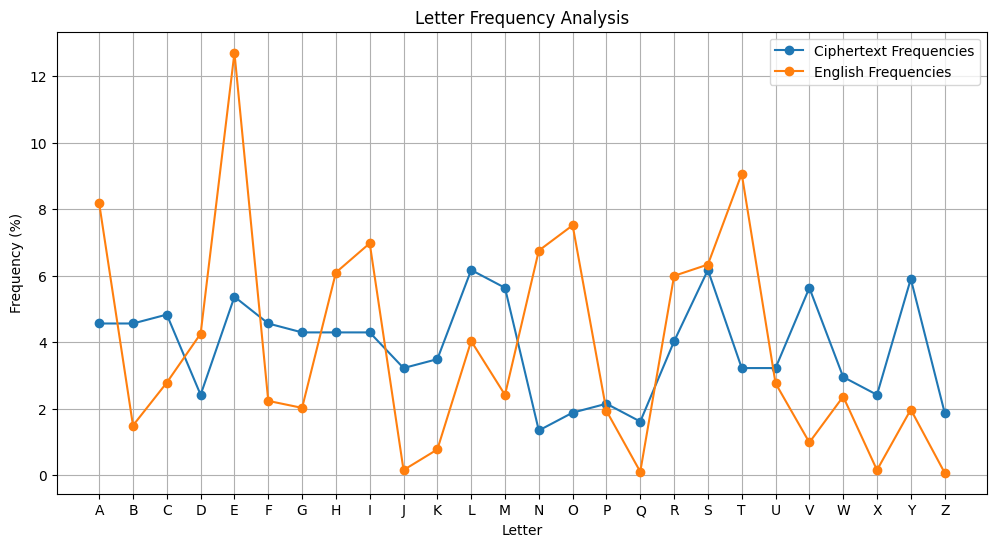

In [26]:
from collections import Counter
import matplotlib.pyplot as plt

# Encrypted text
ciphertext = "BNVSNSIHQCEELSSKKYERIFJKXUMBGYKAMQLJTYAVFBKVTDVBPVVRJYYLAOKYMPQSCGDLFSRLLPROYGESEBUUALRWXMMASAZLGLEDFJBZAVVPXWICGJXASCBYEHOSNMULKCEAHTQOKMFLEBKFXLRRFDTZXCIWBJSICBGAWDVYDHAVFJXZIBKCGJIWEAHTTOEWTUHKRQVVRGZBXYIREMMASCSPBNLHJMBLRFFJELHWEYLWISTFVVYFJCMHYUYRUFSFMGESIGRLWALSWMNUHSIMYYITCCQPZSICEHBCCMZFEGVJYOCDEMMPGHVAAUMELCMOEHVLTIPSUYILVGFLMVWDVYDBTHFRAYISYSGKVSUUHYHGGCKTMBLRX"

# Typical letter frequency in English
english_freq = {
    'E': 12.70, 'T': 9.06, 'A': 8.17, 'O': 7.51, 'I': 6.97, 'N': 6.75, 'S': 6.33,
    'H': 6.09, 'R': 5.99, 'D': 4.25, 'L': 4.03, 'C': 2.78, 'U': 2.76, 'M': 2.41,
    'W': 2.36, 'F': 2.23, 'G': 2.02, 'Y': 1.97, 'P': 1.93, 'B': 1.49, 'V': 0.98,
    'K': 0.77, 'J': 0.15, 'X': 0.15, 'Q': 0.10, 'Z': 0.07
}

# Count the frequency of each letter in the ciphertext
cipher_freq = Counter(ciphertext)

# Calculate the relative frequency of each letter in the ciphertext
total_letters = sum(cipher_freq.values())
cipher_freq_percent = {letter: (count / total_letters) * 100 for letter, count in cipher_freq.items()}

# Sort the frequencies for comparison
cipher_freq_sorted = dict(sorted(cipher_freq_percent.items(), key=lambda x: x[0]))
english_freq_sorted = dict(sorted(english_freq.items(), key=lambda x: x[0]))

# Print the frequencies of the ciphertext and typical English frequencies (optional)

# Plot to compare the frequencies
plt.figure(figsize=(12, 6))
plt.plot(list(cipher_freq_sorted.keys()), list(cipher_freq_sorted.values()), label='Ciphertext Frequencies', marker='o')
plt.plot(list(english_freq_sorted.keys()), list(english_freq_sorted.values()), label='English Frequencies', marker='o')
plt.xlabel('Letter')
plt.ylabel('Frequency (%)')
plt.title('Letter Frequency Analysis')
plt.legend()
plt.grid()
plt.show()



Based on the graph, the presence of valleys in the ciphertext suggests it might be a different type of cipher, as it doesn't show the typical peaks seen in a monoalphabetic cipher. This means the encryption could be more complex, like a polyalphabetic cipher or a block cipher. Now, I will perform a Kasiski analysis to identify repeating patterns in the ciphertext, which can help determine the length of the key if it's a polyalphabetic cipher like Vigenère.

In [27]:
from collections import defaultdict

# Function to find repeated sequences and their distances
def kasiski_analysis(text, sequence_length=3):
    # Dictionary to store sequences and their positions
    sequences = defaultdict(list)

    # Find all sequences of the given length and store their positions
    for i in range(len(text) - sequence_length + 1):
        seq = text[i:i + sequence_length]
        sequences[seq].append(i)
    
    # Filter sequences that repeat and calculate distances between their occurrences
    repeating_sequences = {seq: positions for seq, positions in sequences.items() if len(positions) > 1}

    # Calculate the distances between positions of repeated sequences
    distances = defaultdict(list)
    for seq, positions in repeating_sequences.items():
        for i in range(len(positions) - 1):
            distance = positions[i + 1] - positions[i]
            distances[seq].append(distance)
    
    return distances

# Function to get all factors of a number
def get_factors(n):
    factors = []
    # Loop through all numbers up to n to find factors
    for i in range(1, n + 1):
        if n % i == 0:
            factors.append(i)
    return factors

# Run the Kasiski analysis
kasiski_result = kasiski_analysis(ciphertext)

# Calculate the factors of each distance and display them
print("Kasiski Analysis Results:")
for sequence, dist in kasiski_result.items():
    print(f"Sequence: '{sequence}' - Distances: {dist}")
    for d in dist:
        factors = get_factors(d)
        print(f"  Distance: {d}, Factors: {factors}")



Kasiski Analysis Results:
Sequence: 'AVF' - Distances: [132]
  Distance: 132, Factors: [1, 2, 3, 4, 6, 11, 12, 22, 33, 44, 66, 132]
Sequence: 'VVR' - Distances: [149]
  Distance: 149, Factors: [1, 149]
Sequence: 'GES' - Distances: [180]
  Distance: 180, Factors: [1, 2, 3, 4, 5, 6, 9, 10, 12, 15, 18, 20, 30, 36, 45, 60, 90, 180]
Sequence: 'MMA' - Distances: [120]
  Distance: 120, Factors: [1, 2, 3, 4, 5, 6, 8, 10, 12, 15, 20, 24, 30, 40, 60, 120]
Sequence: 'MAS' - Distances: [120]
  Distance: 120, Factors: [1, 2, 3, 4, 5, 6, 8, 10, 12, 15, 20, 24, 30, 40, 60, 120]
Sequence: 'CGJ' - Distances: [68]
  Distance: 68, Factors: [1, 2, 4, 17, 34, 68]
Sequence: 'ASC' - Distances: [96]
  Distance: 96, Factors: [1, 2, 3, 4, 6, 8, 12, 16, 24, 32, 48, 96]
Sequence: 'EAH' - Distances: [54]
  Distance: 54, Factors: [1, 2, 3, 6, 9, 18, 27, 54]
Sequence: 'AHT' - Distances: [54]
  Distance: 54, Factors: [1, 2, 3, 6, 9, 18, 27, 54]
Sequence: 'SIC' - Distances: [127]
  Distance: 127, Factors: [1, 127]
Seq

As we can see, this analysis shows that there are factors in different strings. We can look for the most common ones to determine a possible key length.

In [28]:
from collections import Counter

# Function to calculate the Index of Coincidence (IC) of a text
def index_of_coincidence(text):
    # Count the frequency of each letter
    frequency = Counter(text)
    n = len(text)
    
    # Calculate the IC using the formula: sum(f_i * (f_i - 1)) / (n * (n - 1))
    ic = sum(f * (f - 1) for f in frequency.values()) / (n * (n - 1)) if n > 1 else 0
    return ic

# Function to calculate the IC for different key lengths
def calculate_ic_for_key_lengths(text, max_key_length=20):
    ic_results = {}
    
    # Test key lengths from 1 to max_key_length
    for key_length in range(1, max_key_length + 1):
        # Split the text into 'key_length' groups
        groups = [''.join([text[i] for i in range(j, len(text), key_length)]) for j in range(key_length)]
        
        # Calculate the IC for each group and find the average IC for this key length
        ic_values = [index_of_coincidence(group) for group in groups]
        average_ic = sum(ic_values) / len(ic_values)
        
        # Store the average IC for the current key length
        ic_results[key_length] = average_ic
    
    return ic_results

# Run the IC calculation for key lengths from 1 to 20
ic_results = calculate_ic_for_key_lengths(ciphertext, max_key_length=20)

# Sort the IC results by value in descending order
sorted_ic_results = sorted(ic_results.items(), key=lambda x: x[1], reverse=True)

# Display the sorted IC results for each key length
print("IC Results for different key lengths (sorted):")
for key_length, ic_value in sorted_ic_results:
    print(f"Key Length: {key_length}, Average IC: {ic_value:.4f}")

# Suggest possible key lengths based on IC values close to 0.06 (typical for English text)
threshold = 0.06
possible_key_lengths = [length for length, ic in sorted_ic_results if abs(ic - threshold) < 0.01]
print("\nPossible key lengths (IC close to 0.06):", possible_key_lengths)



IC Results for different key lengths (sorted):
Key Length: 12, Average IC: 0.0648
Key Length: 6, Average IC: 0.0606
Key Length: 18, Average IC: 0.0550
Key Length: 8, Average IC: 0.0513
Key Length: 4, Average IC: 0.0486
Key Length: 20, Average IC: 0.0484
Key Length: 16, Average IC: 0.0472
Key Length: 15, Average IC: 0.0470
Key Length: 3, Average IC: 0.0468
Key Length: 14, Average IC: 0.0466
Key Length: 10, Average IC: 0.0463
Key Length: 2, Average IC: 0.0453
Key Length: 9, Average IC: 0.0445
Key Length: 11, Average IC: 0.0424
Key Length: 7, Average IC: 0.0418
Key Length: 5, Average IC: 0.0415
Key Length: 1, Average IC: 0.0414
Key Length: 19, Average IC: 0.0411
Key Length: 13, Average IC: 0.0408
Key Length: 17, Average IC: 0.0396

Possible key lengths (IC close to 0.06): [12, 6, 18, 8]


In [29]:
from itertools import product
import string

# Frequency of letters in English (from most to least frequent)
english_freq_order = 'ETAOINSHRDLCUMWFGYPBVKJXQZ'

# Function to divide the text into blocks according to the key length
def divide_text_into_blocks(ciphertext, key_length):
    blocks = ['' for _ in range(key_length)]
    for i, char in enumerate(ciphertext):
        blocks[i % key_length] += char
    return blocks

# Function to get a list of the most likely shifts using frequency analysis
def get_key_letter_candidates(block, num_candidates=3):
    block_counter = Counter(block)
    
    # List to store the most probable key letters
    candidates = []
    
    # Sort the most common letters in the block
    most_common_letters = block_counter.most_common()
    
    # Always select 'E' as the most frequent letter to reduce randomness
    frequent_letter = 'E'

    # Calculate probable shifts based on the most common letters in English
    for i in range(min(num_candidates, len(most_common_letters))):
        most_common_letter = most_common_letters[i][0]
        # The shift is calculated relative to the most frequent letter 'E'
        shift = (string.ascii_uppercase.index(most_common_letter) - string.ascii_uppercase.index(frequent_letter)) % 26
        candidates.append(string.ascii_uppercase[shift])
    
    return candidates

# Function to generate all possible key combinations
def generate_probable_keys(blocks, num_candidates=3):
    # Get candidate lists for each block
    candidate_letters = [get_key_letter_candidates(block, num_candidates) for block in blocks]
    
    # Generate all possible combinations of the keys
    probable_keys = [''.join(key) for key in product(*candidate_letters)]
    
    return probable_keys

# Function to decrypt a Vigenère cipher text
def vigenere_decrypt(ciphertext, key):
    alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    decrypted_text = []
    key_length = len(key)
    key_as_int = [alphabet.index(k) for k in key]
    ciphertext_int = [alphabet.index(c) for c in ciphertext]
    
    for i in range(len(ciphertext_int)):
        # Decrypt by subtracting the key's value
        value = (ciphertext_int[i] - key_as_int[i % key_length]) % 26
        decrypted_text.append(alphabet[value])
    
    # Returns the decrypted text in uppercase with only valid characters
    return ''.join(decrypted_text).upper()

# Function to evaluate a key using the fitness
def evaluate_key(ciphertext, key, quadgrams, alphabet):
    decrypted_text = vigenere_decrypt(ciphertext, key)
    
    if len(decrypted_text) < 4:
        return key, -float('inf')  # If the text is too short, it is not worth evaluating
    
    try:
        # Call the provided calc_fitness function
        fitness_score = calc_fitness(decrypted_text, quadgrams, alphabet)
        return key, fitness_score
    except ValueError:
        return key, -float('inf')  # In case of an error, return a very low score

# Evaluate generated keys without concurrency
def evaluate_keys(ciphertext, probable_keys, quadgrams, alphabet):
    key_fitness_scores = []
    
    # Evaluate each key sequentially
    for key in probable_keys:
        key, fitness_score = evaluate_key(ciphertext, key, quadgrams, alphabet)
        if fitness_score > -float('inf'):
            key_fitness_scores.append((key, fitness_score))
    
    # Sort the keys by fitness score in descending order
    key_fitness_scores.sort(key=lambda x: x[1], reverse=True)
    
    return key_fitness_scores

# Key length obtained (6 in this case)
key_length = 6

# Divide the text into blocks based on the key length
blocks = divide_text_into_blocks(ciphertext, key_length)

# Generate all the most probable keys
probable_keys = generate_probable_keys(blocks, num_candidates=4)
print(f"Total keys generated: {len(probable_keys)}")

with open("./EN.json", "r") as quadgram_fh:
    quadgram_data = json.load(quadgram_fh)
    alphabet = quadgram_data["alphabet"]
    quadgrams = quadgram_data["quadgrams"]

# Evaluate the generated keys and get the top 5 based on fitness
key_fitness_scores = evaluate_keys(ciphertext, probable_keys, quadgrams, alphabet)

# Display the top 5 most probable keys based on fitness
print("Top 5 most probable keys based on fitness:")
for i, (key, score) in enumerate(key_fitness_scores[:5]):
    print(f"Key {i+1}: {key} | Fitness: {score}")



Total keys generated: 4096
Top 5 most probable keys based on fitness:
Key 1: THEORY | Fitness: 96.15216216216217
Key 2: THEORU | Fitness: 78.45729729729729
Key 3: THOORY | Fitness: 76.31864864864865
Key 4: THEOBY | Fitness: 75.9408108108108
Key 5: THAORY | Fitness: 74.53675675675676


In [30]:
vigenere_decrypt(ciphertext, "THEORY")

'IGREWUPAMONGSLOWTALKERSMENINPARTICULARWHODROPPEDWORDSAFEWATATIMELIKEBEANSINAHILLANDWHENIGOTTOMINNEAPOLISWHEREPEOPLETOOKALAKEWOBEGONCOMMATOMEANTHEENDOFASTORYICOULDNTSPEAKAWHOLESENTENCEINCOMPANYANDWASCONSIDEREDNOTTOOBRIGHTSOIENROLLEDINASPEECHCOURSETAUGHTBYORVILLESANDTHEFOUNDEROFREFLEXIVERELAXOLOGYASELFHYPNOTICTECHNIQUETHATENABLEDAPERSONTOSPEAKUPTOTHREEHUNDREDWORDSPERMINUTE'